# INF4039 Deep Learning Systems / Giliojo mokymo sistemų taikymai
**LAB3**

## HOMEWORK TASK

Create a Multilayer Perceptron network to classify one of the following datasets:
1. Predict if the person survived or not in the Titanic crash. Use the `Titanic.csv` dataset from the data_prep practical.
2. Classify handwritten digits from MNIST dataset: http://yann.lecun.com/exdb/mnist/
3. Predict what drug type should the patient get: https://www.kaggle.com/datasets/prathamtripathi/drug-classification
4. Predict if the person will experience stroke, or not: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
4. Any other dataset, which is suitable for classification task.

Your Notebook/script must have the following parts:
1. Data exploration (visualizing data, describing what values will be used for training, what is the target of the classification, etc.);
2. Data preparation (fill empty values, remove outliers, check the correlations);
3. Split the data into train and test sets;
4. Neural network - try at least three different structures and see which one is the best for learning;
5. Model evaluation (accuracy, loss, ROC curve, etc.) - at leas two evaluation methods.

# Classification with Multilayer Perceptron (MLP)

In this lab we will learn how to classify data using Keras deep learing library and the Iris dataset.

In [55]:
#!pip install seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

## Load and explore the Iris dataset

In [2]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Check if there are any null values

In [3]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Dataset visualization

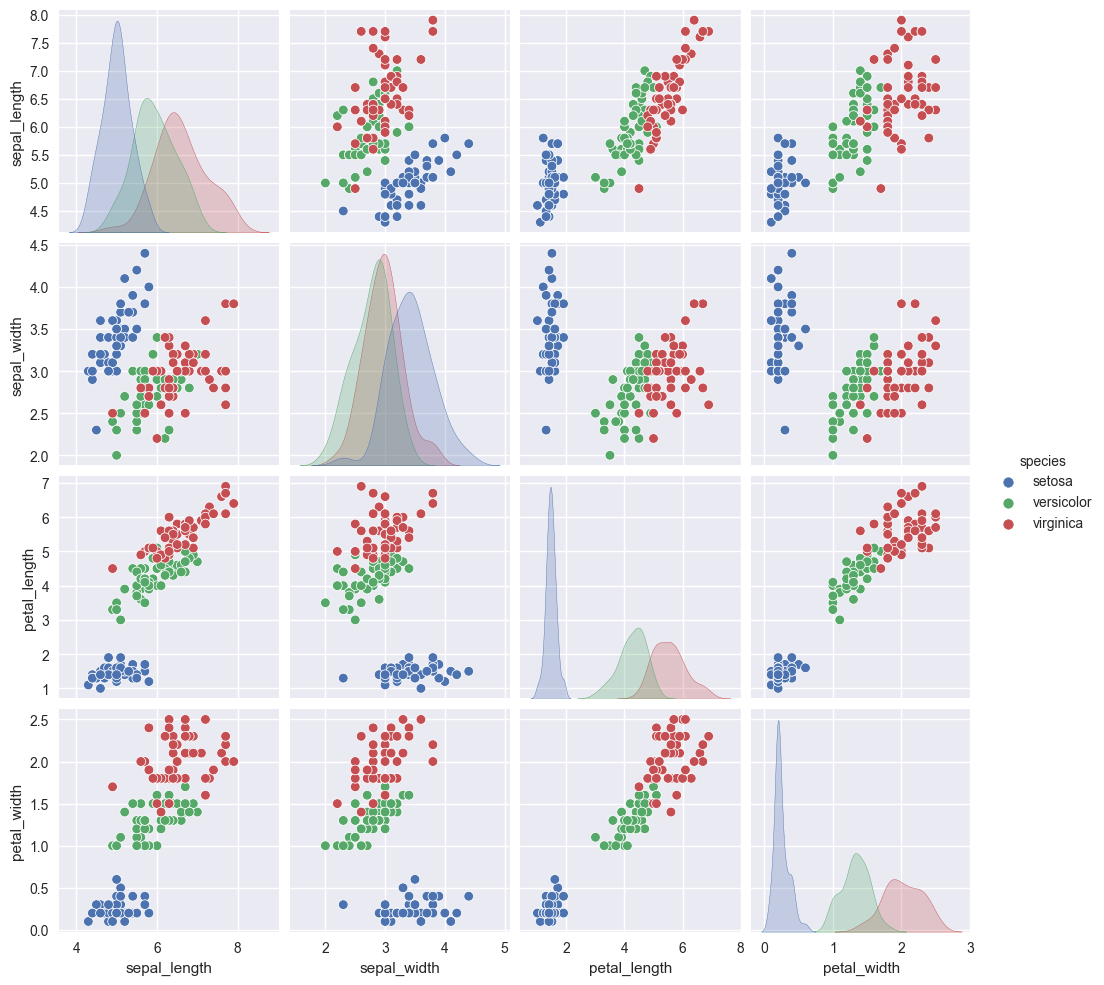

In [4]:
sns.pairplot(iris, hue='species', height=2.5);

In [3]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


## Train / Test split

In [3]:
X = iris.iloc[:, :4]
y = iris.iloc[:, -1]
y.replace("setosa", 0, inplace=True)
y.replace("versicolor", 1, inplace=True)
y.replace("virginica", 2, inplace=True)
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [4]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
y = np.array(y)
Y = enc.fit_transform(y[:, np.newaxis]).toarray()
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120, 3) (30, 3)


## Standardization

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_x_train = scaler.fit_transform(X_train)
normalized_x_test = scaler.transform(X_test)

In [7]:
normalized_x_train

array([[ 0.31553662, -0.04578885,  0.44767531,  0.23380268],
       [ 2.2449325 , -0.04578885,  1.29769171,  1.39742892],
       [-0.2873996 , -1.24028061,  0.05100098, -0.15407273],
       [ 0.67729835, -0.52358555,  1.01435291,  1.13884531],
       [-0.04622511, -0.52358555,  0.73101411,  1.52672073],
       [-0.64916132,  1.62649961, -1.30902526, -1.31769898],
       [-0.40798684, -1.71807731,  0.10766874,  0.10451088],
       [-0.76974857,  0.90980456, -1.36569302, -1.31769898],
       [ 0.79788559, -0.52358555,  0.44767531,  0.36309449],
       [ 1.03906007, -1.24028061,  1.12768843,  0.7509699 ],
       [ 1.15964732, -0.04578885,  0.95768515,  1.13884531],
       [-0.89033581,  1.14870291, -1.36569302, -1.18840717],
       [ 0.19494938, -1.95697567,  0.67434635,  0.36309449],
       [ 0.5567111 , -0.2846872 ,  1.01435291,  0.7509699 ],
       [ 0.91847283, -0.2846872 ,  0.44767531,  0.10451088],
       [ 2.2449325 , -1.00138226,  1.75103379,  1.39742892],
       [-0.16681235,  1.

## Define the Neural Network

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers

np.random.seed(1337)

model = keras.Sequential( 
    [
        layers.InputLayer(input_shape = normalized_x_train[0].shape),
        layers.Dense(8, activation="relu", name="layer1"),
        layers.Dense(8, activation="relu", name="layer2"),
        layers.Dense(3, activation = "sigmoid", name="layer3"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 8)                 40        
                                                                 
 layer2 (Dense)              (None, 8)                 72        
                                                                 
 layer3 (Dense)              (None, 3)                 27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


## Train the Neural Network

Several parameters to choose from:
- [Optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
- [Losses](https://keras.io/api/losses/)
- [Metrics](https://keras.io/api/metrics/)

In [9]:
recall = tf.keras.metrics.Recall()
precision = tf.keras.metrics.Precision()

model.compile(
    optimizer = "adam", 
    loss = "categorical_crossentropy", 
    metrics = ["accuracy", precision, recall])

history = model.fit(normalized_x_train, y_train, 
                    epochs = 100, 
                    batch_size=5,
                    verbose=0,
                    validation_data=(normalized_x_test, y_test))

2022-10-23 22:38:22.066377: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [10]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

In [11]:
score = model.evaluate(normalized_x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test precision:', score[2])
print('Test recall:', score[3])

Test loss: 0.055612076073884964
Test accuracy: 0.9666666388511658
Test precision: 0.9090909361839294
Test recall: 1.0


### Plot Training and Validations accuracy and loss

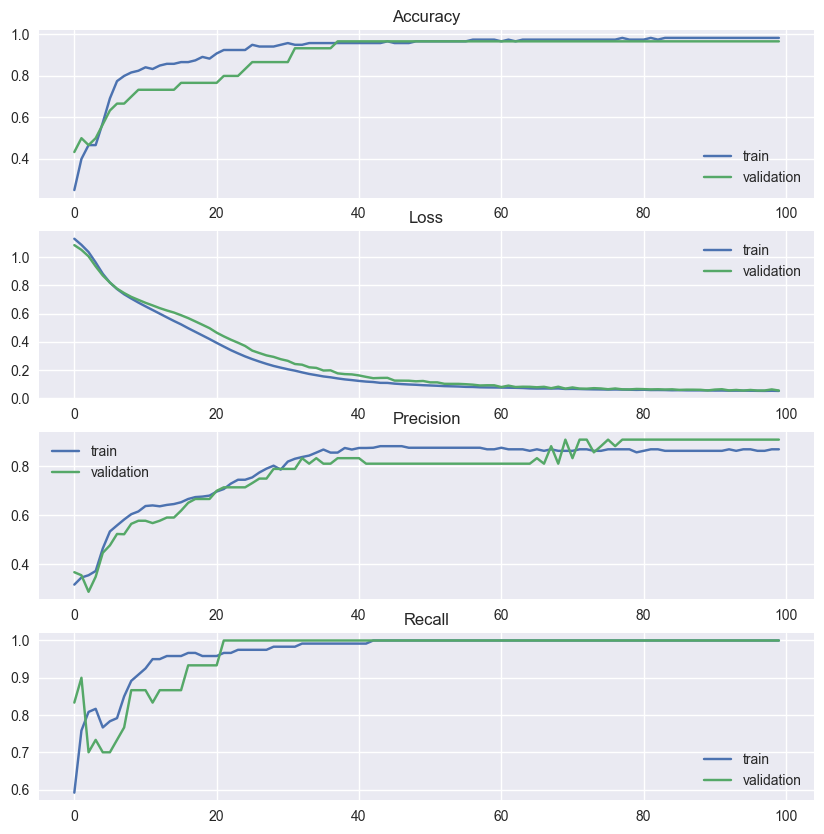

In [12]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(10, 10))

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_precision = history.history['precision']
val_precision = history.history['val_precision']
train_recall = history.history['recall']
val_recall = history.history['val_recall']

ax1.plot(train_accuracy, label='train')
ax1.plot(val_accuracy, label='validation')
ax1.set_title("Accuracy")

ax2.plot(train_loss, label='train')
ax2.plot(val_loss, label='validation')
ax2.set_title("Loss")

ax3.plot(train_precision, label='train')
ax3.plot(val_precision, label='validation')
ax3.set_title("Precision")

ax4.plot(train_recall, label='train')
ax4.plot(val_recall, label='validation')
ax4.set_title("Recall")

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend();

## ROC Curve

The [Receiver Operating Characteristic plot](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) compares the false positive rate with the true positive rate. It tells how much the model is capable of distinguishing between classes.

<img src="img/fp_tp.png" 
     width=600 height=550 
     style="display: block; margin: 0 auto"/>

<img src="img/Roc_curve.png" 
     width=600 height=550 
     style="display: block; margin: 0 auto"/>

1/1 [==============================] - 0s 27ms/step


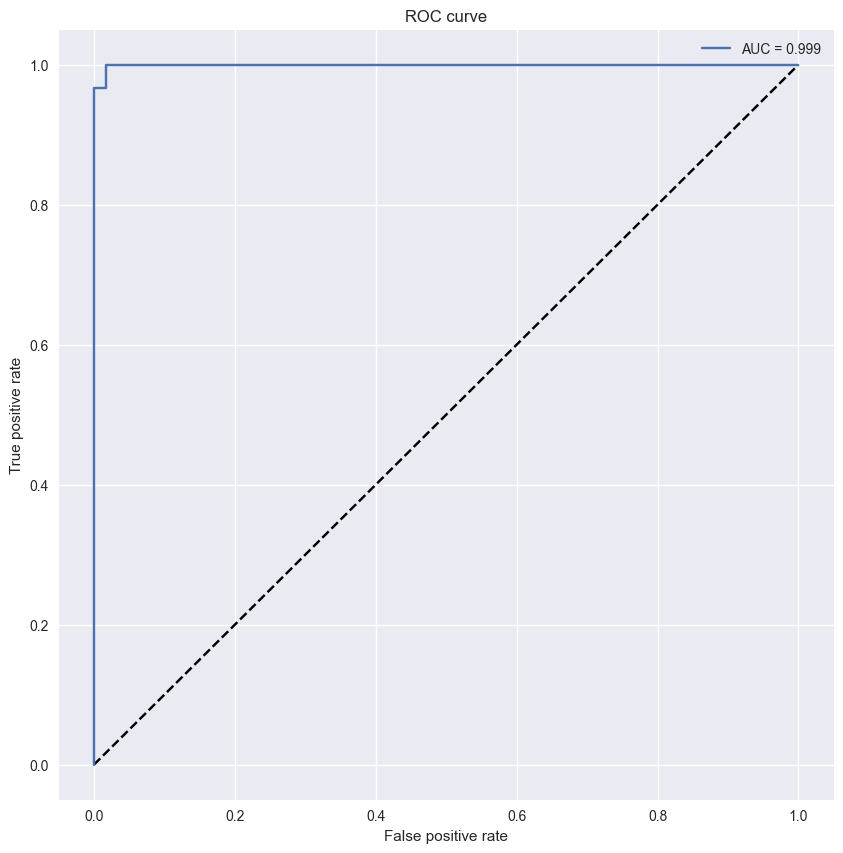

In [14]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

Y_pred = model.predict(normalized_x_test)
fpr, tpr, threshold = roc_curve(y_test.ravel(), Y_pred.ravel())

plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.3f}")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();
